# Properties vs Distance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import pynbody
pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue, pynbody.halo.hop.HOPCatalogue]

%matplotlib inline
print(mpl.get_backend())
mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams.update({'font.size': 9})

module://ipykernel.pylab.backend_inline


In [2]:
def read_file(path, halo_num):
    data = []
    with open(path+'halo'+str(halo_num)+'.data','rb') as f:
        while True:
            try: 
                data.append(pickle.load(f))
            except EOFError:
                break
    data = pd.DataFrame(data)
    # print(data)
    data = data.drop([len(data)-1,len(data)-2,len(data)-3])
    if halo_num==29:
        data = data.drop([48,50])
    if halo_num==116:
        data = data.drop([45])

    return data

def cumulative_sfh(halo_num):
    age = 13.800797497330507
    s = pynbody.load('/home/akinshol/Data/Sims/newh329/h329.cosmo50PLK.3072gst5HbwK1BH.004096')
    halo = s.halos()[halo_num]
    plt.switch_backend('Agg')
    try:
        sfh, bins = pynbody.plot.stars.sfh(halo, filename=None, massform=False, clear=False, legend=False, subplot=False, trange=False, bins=128)
        plt.clf()
    except ValueError:
        print(f'Cannot create SFH, only {len(halo.s)} star particles')
        raise
        
    %matplotlib inline
    sfhmstar = np.sum(sfh)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    c_sfh = np.empty(shape=sfh.shape)
    for i in range(len(bincenters)):
        c_sfh[i] = np.sum(sfh[:i+1])/sfhmstar
    return c_sfh,age-bincenters

In [5]:
path = '/home/akinshol/Data/Timescales/h329/'
data = read_file(path, 29)
data[:10]

,Pram,Prest,gasfrac,gtemp,h1dist,haloid,mgas,mstar,ratio,time
0,1.959743e+07,None,0.0,nan,1.202574,29,0.0,109637.24693921806,NaN,13.800797
1,2.687202e+07,None,0.0,nan,1.102714,27,0.0,109877.08066241498,NaN,13.585307
2,4.957777e+07,None,0.0,nan,0.928648,23,0.0,110292.53918331672,NaN,13.262072
3,1.959743e+07,None,0.0,nan,1.202574,29,0.0,109637.24693921806,NaN,13.800797
4,2.687202e+07,None,0.0,nan,1.102714,27,0.0,109877.08066241498,NaN,13.585307
5,4.957777e+07,None,0.0,nan,0.928648,23,0.0,110292.53918331672,NaN,13.262072
6,1.065134e+08,None,0.0,nan,0.732637,21,0.0,110791.68514039581,NaN,12.938837
7,2.721281e+08,None,0.0,nan,0.521785,18,0.0,111406.7820971671,NaN,12.615601
8,7.552787e+08,27572029.01739814,0.9300502229274104,15025.431954592468,0.386644,17,1491248.653585623,112157.93331007588,27.392933,12.292366
9,4.620379e+08,90101584.4090433,0.9665023826200485,15706.852636972715,0.405634,15,3247392.041199306,112550.05474886396,5.127967,12.150951


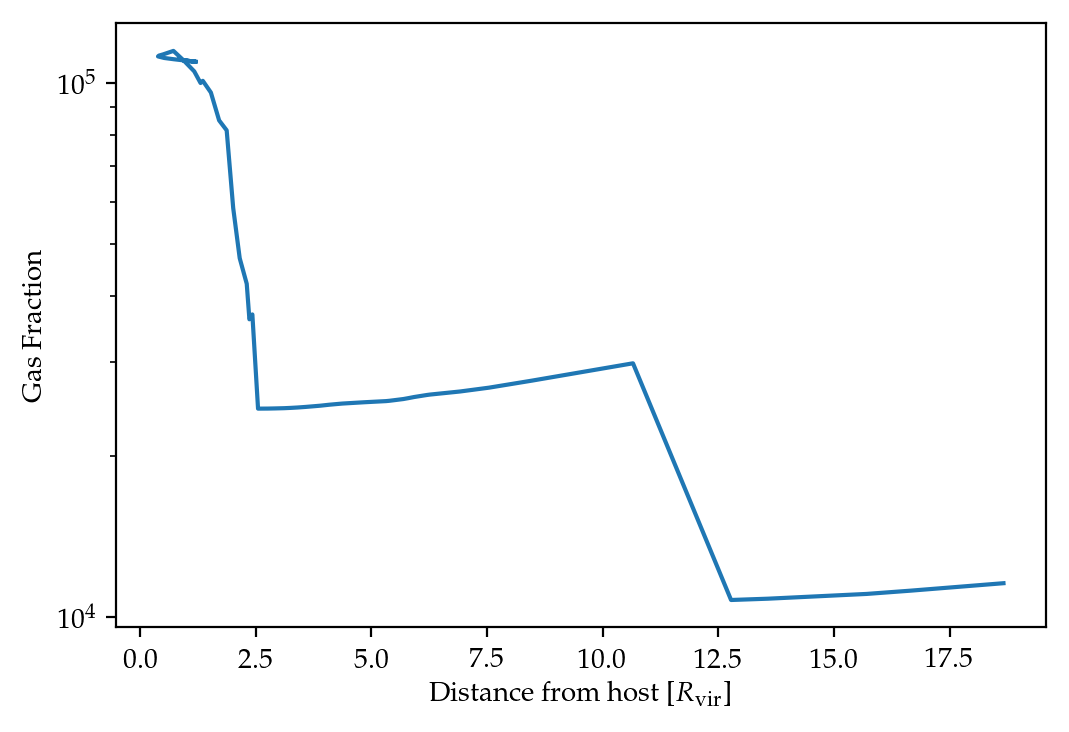

In [21]:
plt.figure(dpi=200)
plt.plot(data['h1dist'], data['mstar'])
plt.semilogy()
# plt.ylabel(r'$P_{\mathrm{ram}} / P_{\mathrm{rest}}$')
plt.ylabel('Gas Fraction')
plt.xlabel(r'Distance from host [$R_{\mathrm{vir}}$]')
plt.show()